In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
%matplotlib inline

# Prepare midline data

In [2]:
ordered_verts = ['T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'L1', 'L2', 'L3', 'L4']

In [3]:
points_path = '/home/donal/PhD/initial_spines/CT_models/MIP/data/points/'
data_list = '/home/donal/PhD/initial_spines/CT_models/data_lists/data_list_all_forviewing.txt'
coronal_path = '../images_coronal/all_projections/'

In [4]:
def get_id():
    """
    Collect path to point files in a dict.
    """
    pts_files = {}
    with open(data_list, 'r') as f:
        # Read data list (pts file : image name)
        lines = f.readlines()
        lines = [line.strip() for line in lines]
        start = lines.index('{')
        end = lines.index('}')
        info_list = lines[start+1:end]
        # Iterate over points file
        for line in info_list:
            pts, img = line.split(':')
            if '_Sag_' in pts:
                name = pts.split('.')[0].split('_Sag_')[0]
            else:
                name = pts.split('.')[0].split('_midline_')[0]
            # Find points w. matching coronal projection (accounts for failures)
            matched_mip = [filename for filename in os.listdir(
                coronal_path) if name in filename]
            
            # If multiple/no matches (some have slightly diff. file names -> ID_SAG_3mm.png ...)
            if len(matched_mip) != 1:
                continue
            id_ = matched_mip[0].split('.npy')[0]
            file = list(filter(lambda x: id_ in x, os.listdir(points_path)))
            pts_files[id_] = file
    return pts_files

In [5]:
def get_points(pts_files):
    """
     Get coordinates of each vertebral centre point
    """
    pts_dict = {}
    for key, val in pts_files.items():
        pts_list = []
        name = f'{key}_kj'
        filename = val[0]
        with open(points_path + filename, 'r') as f:
            lines = f.readlines()
            lines = [line.strip() for line in lines]
            start = lines.index('{')
            end = lines.index('}')
            points = lines[start+1:end]
            for coord in points:
                x, y = coord.split(' ')
                x, y = float(x), float(y)
                pts_list.append((x, y))
        pts_dict[name] = pts_list
    return pts_dict

In [6]:
pts_files = get_id()
print(f'Found {len(list(pts_files.keys()))} points files w/ matching MIP')
pts_dict= get_points(pts_files)
print(f'Found {len(list(pts_dict.keys()))} vertebral annotations.')

Found 301 points files w/ matching MIP
Found 301 vertebral annotations.


In [7]:
pts_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in pts_dict.items() ]))
pts_df.columns = pts_dict.keys()
pts_df.T.to_csv('../formatted_pts.csv', index=True)

In [8]:
df = pd.read_csv('../formatted_pts.csv', index_col=0, header=0)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
01_06_2014_363_Sag_kj,"(195.158, 6.79349)","(194.541, 32.1147)","(194.541, 58.6711)","(194.541, 88.3154)","(194.541, 105.608)","(192.688, 126.606)","(192.688, 161.809)","(191.453, 198.864)","(190.835, 228.508)","(192.688, 258.77)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01_06_2014_364_Sag_kj,"(211.02, 22.2126)","(210.464, 51.6443)","(211.02, 84.9631)","(210.464, 122.725)","(209.909, 158.82)","(207.688, 194.915)","(207.132, 232.677)","(203.8, 266.551)","(202.134, 297.093)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01_06_2014_365_Sag_kj,"(238.23, 14.9935)","(238.785, 54.9761)","(239.341, 94.4035)","(240.451, 134.941)","(236.564, 176.59)","(233.787, 217.128)","(233.787, 251.557)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01_06_2014_366_Sag_kj,"(196.026, 7.21909)","(195.471, 34.4295)","(194.915, 63.8612)","(193.249, 93.2928)","(192.139, 127.167)","(190.473, 162.152)","(188.252, 197.692)","(187.141, 233.232)","(185.475, 268.772)","(184.92, 304.868)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01_06_2014_367_Sag_kj,"(218.239, 28.8764)","(218.239, 56.6421)","(217.683, 83.8525)","(218.239, 111.618)","(217.128, 144.937)","(215.462, 180.477)","(214.907, 219.905)","(213.796, 260.998)","(213.796, 300.425)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Load scan

In [9]:
import SimpleITK as sitk
from PIL import Image
from ast import literal_eval
from scipy import optimize, interpolate

In [10]:
def get_ROI(img, fit, width=4):
    roi = np.zeros((512, 2*width, 512))
    roi -= 1024
    for i, y in enumerate(fit):
        sample = img[i, int(y)-width:int(y)+width]
        roi[i] = sample
    return roi

def plot_midline(name, mip, scaling, padding, orig_scale, plot=False):
    img = Image.open(f'/home/donal/PhD/initial_spines/CT_models/MIP/data/images/{name}_kj.tiff')
    img = np.array(img)
    # --- Load coordinates and transform to frame ---
    og_x, og_y = zip(*[literal_eval(x) for x in df.loc[f'{name}_kj'].dropna().values])
    x = np.array(og_x, dtype=float)
    x *= min(orig_scale) 
    x /= 4*0.3125
    x -= padding[2]
    y = np.array(og_y, dtype=float)
    y *= min(orig_scale)
    y /= 4*0.3125
    y -= padding[1]
    # --- FIT 1st order spline ---
    tck = interpolate.splrep(og_y, og_x, k=1, s=0)
    xd = np.linspace(0, 512, 512)
    fit = interpolate.splev(xd, tck, der=0)
    if plot:
        fig, ax = plt.subplots(1,2, figsize=(20, 10))
        ax[0].imshow(img, cmap='gray')
        sns.scatterplot(x=og_x, y=og_y, color='y', s=45, edgecolor='k', ax=ax[0])
        ax[0].plot(fit, xd, linewidth=1.5, color='r')
        ax[0].set_ylim([512, 0])
        # My attempt
        ax[1].imshow(mip.T, cmap='gray')
        sns.scatterplot(x=x, y=y, color='y', s=45, edgecolor='k', ax=ax[1])
    return fit

In [11]:
def pad_image(img, output_shape=(512, 512)):
    """
    Insert into array of fixed size - such that all inputs to model have same dimensions
    """
    padding = [(s-x)//2.0 for x, s in zip(output_shape, img.GetSize())]
    output_origin = img.TransformContinuousIndexToPhysicalPoint(padding)
    pad = sitk.ResampleImageFilter()
    pad.SetInterpolator(sitk.sitkLinear)
    pad.SetDefaultPixelValue(-1024)
    pad.SetOutputSpacing(img.GetSpacing())
    pad.SetSize(output_shape)
    pad.SetOutputOrigin(output_origin)
    #pad.SetOutputDirection(img.GetDirection())
    pad.SetOutputDirection(base_direction)
    return pad.Execute(img), padding

def normalize(img, min=0, max=255):
    """
    Cast float image to int, and normalise to [0, 255]
    """
    img = sitk.Cast(img, sitk.sitkInt32)
    norm = sitk.RescaleIntensityImageFilter()
    norm.SetOutputMaximum(max)
    norm.SetOutputMinimum(min)
    return norm.Execute(img)

def resample(image, new_spacing, output_shape=(512, 512, 512)):
    """
    Resample image to new resolution with pixel dims defined by new_spacing
    """
    # Calculate image size
    orig_size = np.array(image.GetSize(), dtype=np.int)
    orig_spacing = image.GetSpacing()
    ratio = [x/y for x, y in zip(orig_spacing, new_spacing)]
    new_size = orig_size*ratio
    new_size = np.ceil(new_size).astype(np.int)
    new_size = [int(s) for s in new_size]

    # Prepare filter
    resample = sitk.ResampleImageFilter()
    resample.SetInterpolator(sitk.sitkLinear)
    resample.SetDefaultPixelValue(-1024)
    resample.SetOutputDirection(image.GetDirection())
    resample.SetOutputOrigin(image.GetOrigin())
    resample.SetOutputSpacing(new_spacing)
    resample.SetSize(new_size)
    #resample.SetTransform(transform)
    res_img = resample.Execute(image)
    
    # Define transformation
#     transform = sitk.AffineTransform(3)
#     #transform.SetTranslation(-np.array(image.GetOrigin()))
#     transform.SetCenter(res_img.TransformContinuousIndexToPhysicalPoint(np.array(res_img.GetSize())/2.0))
    
#     matrix = np.array(transform.GetMatrix()).reshape((3, 3))
#     # Get rotation angles in radians
#     # !! TODO - Needs to vary according to image!)
#     rad_x = 0
#     rad_y = np.pi/2
#     rad_z = 0
#     # Define cosine matrix
#     R_x = np.array([[0, np.cos(rad_x), -np.sin(rad_x)],
#                     [1, 0, 0],
#                     [0, np.sin(rad_x), np.cos(rad_x)]])
    
#     R_y = np.array([[np.cos(rad_y), 0, np.sin(rad_y)],
#                     [-np.sin(rad_y), 0, np.cos(rad_y)],
#                     [0, 1, 0]])
     
#     R_z = np.array([[0, 0, 1], 
#                     [np.cos(rad_z), -np.sin(rad_z), 0],
#                     [np.sin(rad_z), np.cos(rad_z), 0]])
    
#     new_matrix = np.dot(R_z, matrix)
#     new_matrix = np.dot(R_y, new_matrix)
#     new_matrix = np.dot(R_x, new_matrix)
#     transform.SetMatrix(new_matrix.ravel())  
    
    padding = [(s-x)//2 for x, s in zip(output_shape, res_img.GetSize())]
    output_origin = res_img.TransformContinuousIndexToPhysicalPoint(padding)
    
    
    pad = sitk.ResampleImageFilter()
    pad.SetInterpolator(sitk.sitkLinear)
    pad.SetDefaultPixelValue(-1024)
    pad.SetOutputSpacing(res_img.GetSpacing())
    pad.SetOutputDirection(res_img.GetDirection())
    pad.SetSize(output_shape)
    pad.SetOutputOrigin(output_origin)
    #pad.SetTransform(transform)
    
    return pad.Execute(res_img), res_img, ratio, padding

In [12]:
def get_orig_pix(name):
    pix_info = f'/home/donal/CT_volumes/resampled_mip/pixels/{name}_mip_WL.txt'
    with open(pix_info, 'r') as f:
        text = f.readlines()
        x, y, z = (float(x) for x in text[1].split(' '))
    return (x, y, z)

def resample_data(name, data):
    # Resample Image
    min_pix = 4*0.3125
    pad_img, res_img, scaling, padding = resample(data, (min_pix, min_pix, min_pix))
    return pad_img, res_img, scaling, padding

In [13]:
def get_sagittal_midline(name, plot=False):
    # ---- READ VOLUME -- 
    reader = sitk.ImageFileReader()
    reader.SetImageIO("NiftiImageIO")
    reader.SetFileName(f'../ct_volumes/{name}.nii')
    data = reader.Execute()
    
    # ---- Norm. coordinates --- 
    orig_spacing = data.GetSpacing()
    orig_size =  data.GetSize()
    orig_direction = data.GetDirection() 
    print(orig_spacing, orig_size, orig_direction)
    data.SetDirection(base_direction)
    # --- REFORMAT DATA ---
    pad_img, res_img, scale, padding = resample_data(name, data)
    pad_img = sitk.GetArrayFromImage(pad_img)
          
    # ----Coronal MIP ---
    #clipped = np.clip(sitk.GetArrayFromImage(res_img), a_min=-100, a_max=900)
    clipped = np.clip(pad_img, a_min=-100, a_max=900)
    mip = np.max(clipped, axis=-1)
    
    # Get Fit from points
    fit = plot_midline(name, mip, scale, padding, orig_spacing, plot=True)
    
    if plot:
#         fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#         ax.imshow(res_img[:, 150, :])
        pass

01_06_2014_363_Sag_kj
(0.9765625, 0.9765625, 3.0) (512, 512, 121) (-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0)
(0.8769999742507935, 0.8769999742507935, 3.0) (512, 512, 130) (-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0)


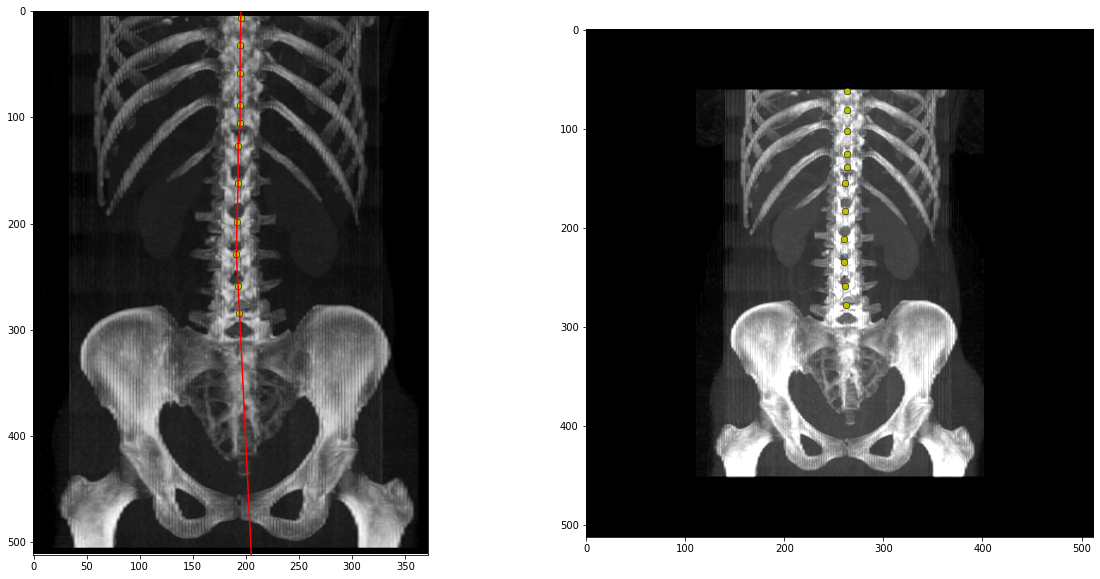

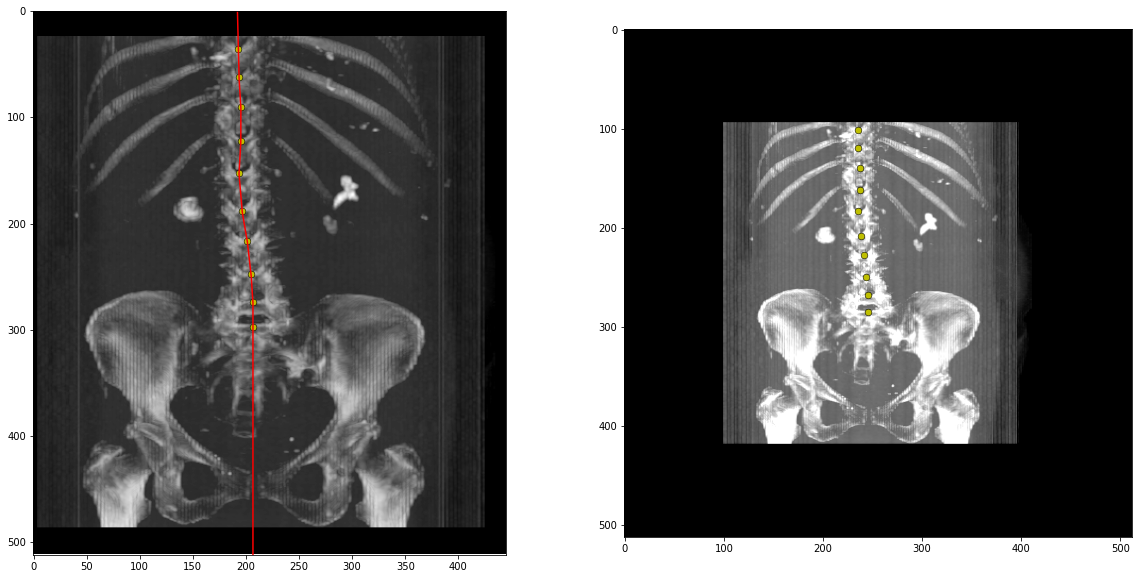

In [15]:
base_direction = (0.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, -1.0, 0.0)
base_origin = (0.0, 0.0, 0.0)
for name in df.index:
    if name  == '01_06_2014_363_Sag_kj':
        print(name)
        get_sagittal_midline(name.strip('_kj'), plot=True)
        
    elif name == 'fr_555_LS_Sag_kj':
        get_sagittal_midline(name.strip('_kj'), plot=True)
        break

In [135]:
names = ['01_06_2014_363_Sag', 'fr_555_LS_Sag', '03_06_2014_389_Sag']
for name in names:
    reader = sitk.ImageFileReader()
    reader.SetImageIO("NiftiImageIO")
    reader.SetFileName(f'../ct_volumes/{name}.nii')
    data = reader.Execute()
    print(data.GetDirection(), data.GetSize(), data.GetOrigin())
    

(-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0) (512, 512, 121) (185.390625, -237.4031219482422, 122.99996948242188)
(-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0) (512, 512, 130) (183.54969787597656, -224.17059326171875, 1625.1734619140625)
